In [1]:
##################################################################################################
##################################################################################################


### This file and the source code provided can be used only for the projects and assignments  
### of this course

### Last Edit by Dr. Atef Bader: 8/30/2020


##################################################################################################
##################################################################################################



# ElasticSearch

- Download __[elasticsearch](https://www.elastic.co/downloads/elasticsearch)__  to your laptop
- Getting Started with  __[elasticsearch](https://www.elastic.co/start)__ 



## The three major platofrms are supported:
1. Windows
2. MacOS
3. Linux



## Startup ElasticSearch Server

After you install ElasticSearch, go to the directory where you installed ElasticSearch under \bin directory and type from the terminal/command prompt the following command:
**elasticsearch**



## elasticsearch package

We need __[elasticsearch](https://anaconda.org/anaconda/elasticsearch)__  package to connect to ElasticSearch Servers

To install elastic search pakage, execute following command from the command/terminal windows:
- ** conda install -c anaconda elasticsearch **    



# Yelp

### You need to install Yelp API package before you run this script

- pip install yelpapi


### Here is the official URL for Yelp API docs:

https://www.yelp.com/developers/documentation/v3/get_started


### Use the business search on terms and sort on terms:
    
    https://www.yelp.com/developers/documentation/v3/business_search
    


# Chicago Social Hub


We are interested to collect data about Chicago businesses from Yelp

![image.png](attachment:image.png)



# Why use Yelp data?

Imagine you are visiting Chicago for the first time and you like to get an idea about popular restaurants that serve Chicago-Style Food? 
- Chicago Style Hotdogs
- Chicago Style Pizza

![image.png](attachment:image.png)


![image.png](attachment:image.png)

## Yelp has a significant dominance in US-traffic for consumer and busibess reviews; see below the rank of Yelp in the top-ten list


![image.png](attachment:image.png)




### Create your API Key:

Here is the URL for the developer API  in order to generate your App Key

https://www.yelp.com/developers/v3/manage_app





![image.png](attachment:image.png)




### Make a note of the following restrictions:

- The API **limit**  ,which is optional, can be used to specify the number of business results to return. By default, it will return 20. Maximum is 50.
- You have 5000 Yelp-API calls per day

See image below as an example and keep this in mind when you make calls to Yelp

![image.png](attachment:image.png)

# Chicago Community Areas

We are interested in the community areas of downtown chicago:

- Chicago Loop
- West Town
- Near North Side Chicago
- Near South Side Chicago
- Near West Side Chicago


You can see the official list for the Boundaries of different Community Areas at the following URL:

https://www.chicago.gov/city/en/depts/doit/dataset/boundaries_-_communityareas.html


![image.png](attachment:image.png)

## Create your API Key before you proceed

Here is the URL for the developer API  in order to generate key

https://www.yelp.com/developers/v3/manage_app


#### pip install yelp

In [2]:
from yelpapi import YelpAPI

from pprint import pprint

yelp_api = YelpAPI('e8bYLtysgSAREQC36YVeAPjTLNuMJAdU0xZAcyuXi5WeMPlqIKvfdE3GRSo7tN74O-8ROcgEFWsh1S5Bx67Xyebueu2D86fUXYm5cD-b1Q4m7Xr9BA9shDptJxyCYXYx')




Please note that yelp limits the number businesses retruned to **50** so we need to spin through a loop tp retrieve the maximum number taht we can get from Yelp; the limit is 1000 businesses. And you are also limited to 5000 API calls per day.

The API business search docymentation is available at the following URL: https://www.yelp.com/developers/documentation/v3/business_search

Make a note of the following documentations **copied from Yelp API** for parameters limit and total:

- **limit** : The default number of business results to return is  20 and the Maximum limit can be set is 50.
- **total** :  	Total number of business Yelp finds based on the search criteria. Sometimes, the value may exceed 1000. In such case, you still can only get up to 1000 businesses. total may be limited to 40 for non-default sorts such as "distance" and "review_count".


Read the following question/amswer copied from (https://www.yelp.com/developers/faq) to see how to get the 1000 businesses:

**How do I get more than 50 results per request and how to get more than 1000 businesses?**

- The API can only return up to 1,000 results at this time. The API doesn't allow more than 50 per request. You need to use the offset parameter to get the next page of results. (For using offset, give it any number. If you have limit=50, that means you're getting results 1-50, so give it offset=51 and you'll get 51-100.)


**Warning:**If you attempt tp retrieve more than 1000 businesses you get the following error:

![image.png](attachment:image.png)


There are certain categories that are recognized by Yelp and accordingly index their reviews.
Visit the following URL to see the list: https://www.yelp.com/developers/documentation/v3/all_category_list

For **Chicago Social Hub**, we will collect businesses in the following categories
- Restaurants
- Entertainment
- Nightlife


In [3]:
import pandas as pd

df__business_reviews = pd.DataFrame()

list__business_reviews_documents = []


## Chicago Downtown Neighborhoods and Zip-Codes


- **The following zip codes for Chicago downtown area and neighborhoods**
- **Visit the following website for  complete list of Chicago zip-codes for Chicago downtown area**

 (https://www.seechicagorealestate.com/chicago-zip-codes-by-neighborhood.php)


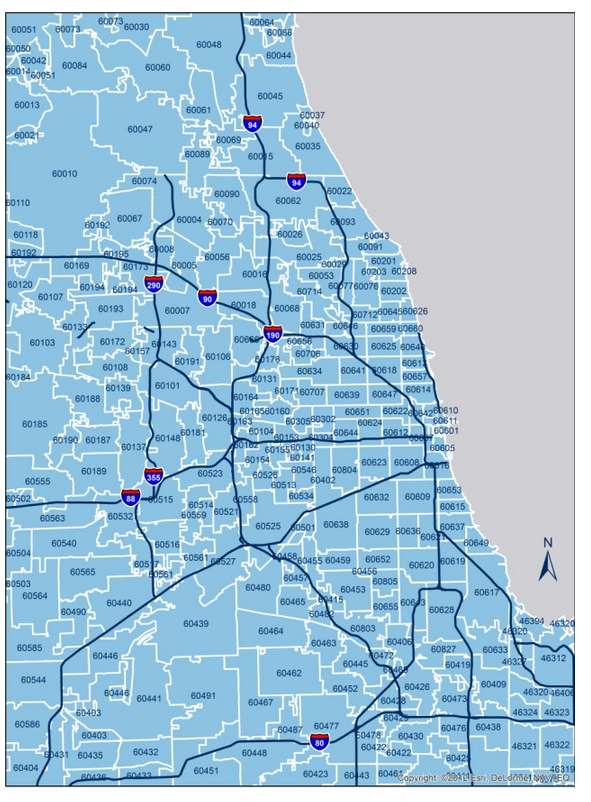

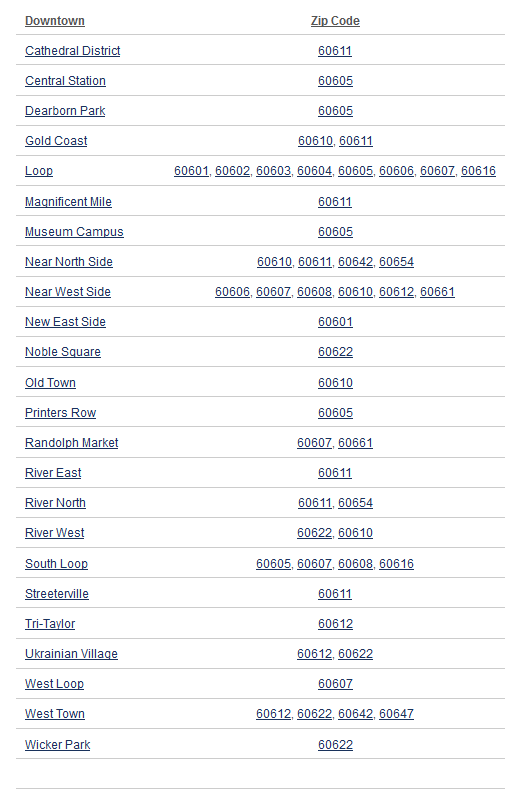

In [5]:
# The following zip codes for Chicago downtown area and neighborhoods.
# Visit the following website for Chicago complete list of zip-codes for Chicago downtown.
# (https://www.seechicagorealestate.com/chicago-zip-codes-by-neighborhood.php)


chicago_downtown_zipcodes = [60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60610, 60611, 60612, 60616]


for zip_code in chicago_downtown_zipcodes:
    for x in range(20):
        response = yelp_api.search_query(categories='Restaurants+Entertainment+Nightlife', 
                                     location=zip_code, 
                                 sort_by='rating', limit=50, offset=x*50)
        df__business_reviews = df__business_reviews.append(pd.DataFrame(response['businesses']))

        for review in response['businesses']:
            index_review = {  
                "_index": "chicago_yelp_reviews",
                "_type": "yelp_review",
                "_id": review['id'],
                "_source": review
            }
            list__business_reviews_documents.append(index_review)                      

    


YelpAPIError: INTERNAL_ERROR: Something went wrong internally, please try again later.

In [ ]:
df__business_reviews.tail()

In [ ]:
df__business_reviews.describe()

## Chicago-Style Food

Chicago is famous for **Chicago-style deep-dish** and you can read more about the origin of this term at the following link for the Chicago Tribune article: https://www.chicagotribune.com/news/ct-xpm-2009-02-18-0902180055-story.html, but Chicago is also know for its chicago-style-hot-dogs, https://en.wikipedia.org/wiki/Chicago-style_hot_dog.



When people visit Chicago, they like to taste these two types of food  that got Chicago signature:
- Pizza 
- Hot Dogs


Fo illustration purposes, we will consider the following two  famous restaurants in Chicago downtown:
- Portillo's - For Chicago Style Hot Dogs
- Giordano's - For Chicago-Style Pizza


**Note 1:**
Some of the business names might appear multiple timeas and accordingly leads to the conclusion that the dataset has redundant documents but that is not correct since a Restaruant Chain might have the same business name in  different locations and that is captured under the alias.

Here is an example for Potbelly Sandwich Shop:

'alias': 'potbelly-sandwich-shop-chicago-25'
'name': 'Potbelly Sandwich Shop',

'alias': 'potbelly-sandwich-shop-chicago-10'
'name': 'Potbelly Sandwich Shop'

**Note 2:**
Yelp reviews might refer to business names with or without **s** at the end of the business name. For exmple you might see reviews for business names:
- Portillo's or Portillo
- Giordano's or Giordano



In [ ]:
df__business_reviews.name.value_counts()

In [ ]:
pprint(list__business_reviews_documents)


In [ ]:
# The following code  writes the data to a file  in case data needed for debugging purposes
import json

output_file = open('chicago_yelp_reviews.json', 'w', encoding='utf-8')

for dic in list__business_reviews_documents:
    json.dump(dic, output_file) 
    output_file.write("\n")
    


### Load and Index the Yelp Reviews for Chicago Businesses  into ElasticSearch

Yelp reviews of Chicago Businesses are insreted into ElasticSearch engine using the bulk Api of elastic search. 

Here is the link __[API DOCS](http://elasticsearch-py.readthedocs.io/en/master/helpers.html)__ for the API documentation. 

In [ ]:
#Import Elascticsearch and helpers from  elasticsearch

from elasticsearch import Elasticsearch, helpers 

### Comment the following line if you want to use the Remote Database Server 
es = Elasticsearch()


In [ ]:
# Start the bulk document-indexing
    
helpers.bulk(es, list__business_reviews_documents)       

## Sanity Test:

Execute following commands from the command window/terminal:

**To verify the index got created:**
- curl -XGET "http://localhost:9200/_cat/indices?v"


**To dump the documents in the index to stdout:**
- curl -XGET "http://localhost:9200/chicago_yelp_reviews/yelp_review/_search?pretty=true"

**To dump the mapping of  the index to stdout:**
- curl -XGET "localhost:9200/chicago_yelp_reviews/_mapping/yelp_review?pretty"


## How to delete  the index?
**To delete the index you created:**
- curl -XDELETE "http://localhost:9200/chicago_yelp_reviews?pretty"

